In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# 1. Define State

In [2]:
class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str

# 2. Define Nodes

In [3]:
def bmi_calculate(state: BMIState) -> BMIState:
    height = state['height']
    weight = state['weight']
    
    bmi = weight / (height ** 2)
    state['bmi'] = bmi    
    return state

In [4]:
def bmi_label(state: BMIState) -> BMIState:
    bmi = state['bmi']
    
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
        
    return state

# 3. Graph Create

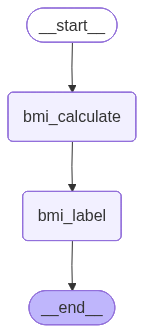

In [5]:
# define graph

graph = StateGraph(BMIState)

# add node
graph.add_node('bmi_calculate',bmi_calculate)
graph.add_node('bmi_label',bmi_label)

# add edge
graph.add_edge(START, 'bmi_calculate')
graph.add_edge('bmi_calculate','bmi_label')
graph.add_edge('bmi_label', END)

# compile graph
workflow = graph.compile()
workflow

# 4. Execute Graph

In [6]:
initial_state = {'weight':80, 'height':1.74}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight': 80, 'height': 1.74, 'bmi': 26.42356982428326, 'category': 'Overweight'}
